# Analyze E-Commerce Sales Data

### Importing Data

In [2]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [3]:
data = pd.read_csv('2019salesdata.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### EDA

In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
null_percent = data.isnull().sum() / len(data) * 100
null_count = data.isnull().sum()
result = pd.concat([null_percent, null_count], axis=1)
result.columns = ['% missing', 'count missing']
result

,% missing,count missing
Order ID,0.291678,545
Product,0.291678,545
Quantity Ordered,0.291678,545
Price Each,0.291678,545
Order Date,0.291678,545
Purchase Address,0.291678,545


In [6]:
data.dropna(axis=0,inplace=True)

In [7]:
data.duplicated().sum()

618

In [8]:
data.drop_duplicates( inplace=True)

In [9]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [10]:
data[["Product",'Price Each']].value_counts()

Product                     Price Each
USB-C Charging Cable        11.95         21859
Lightning Charging Cable    14.95         21610
AAA Batteries (4-pack)      2.99          20612
AA Batteries (4-pack)       3.84          20558
Wired Headphones            11.99         18849
Apple Airpods Headphones    150           15426
Bose SoundSport Headphones  99.99         13298
27in FHD Monitor            149.99         7498
iPhone                      700            6802
27in 4K Gaming Monitor      389.99         6225
34in Ultrawide Monitor      379.99         6174
Google Phone                600            5487
Flatscreen TV               300            4774
Macbook Pro Laptop          1700           4699
ThinkPad Laptop             999.99         4126
20in Monitor                109.99         4098
Vareebadd Phone             400            2056
LG Washing Machine          600.0           666
LG Dryer                    600.0           646
Apple Airpods Headphones    150.0            99
i

In [11]:
data.drop(data.loc[data["Price Each"] == "Price Each"].index, axis=0, inplace=True)

In [12]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [13]:
# Calculate sales
data["Sales"] = data["Quantity Ordered"].astype(int) * data["Price Each"].astype(float)

# Split "Order Date" column into date and time columns
data[["Order_date", "Order_Time"]] = data['Order Date'].str.split(' ', expand=True)

# Split "Order_date" column into month, day, and year columns
data[[ 'Month', 'Day', 'Year']] = data['Order_date'].str.split('/', expand=True)

# Split "Order_Time" column into hour and minute columns
data[["Order_Hour", "Order_Minutes"]] = data['Order_Time'].str.split(':', expand=True)

#Split "Purchase Address" column into Location column
data['City'] = data['Purchase Address'].str.split(', ').str[1]

#converting date into week and quarter
data["Order_date"]=pd.to_datetime(data['Order_date'], format='%m/%d/%y')
data['Week'] = data['Order_date'].dt.week
data['Quarter'] = data['Order_date'].dt.quarter
data = data.sort_values('Order_date')



In [14]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Order_date,Order_Time,Month,Day,Year,Order_Hour,Order_Minutes,City,Week,Quarter
70630,144159,AA Batteries (4-pack),1,3.84,01/01/19 21:46,"269 Main St, Atlanta, GA 30301",3.84,2019-01-01,21:46,01,01,19,21,46,Atlanta,1,1
71311,144804,Wired Headphones,1,11.99,01/01/19 07:29,"628 Lake St, New York City, NY 10001",11.99,2019-01-01,07:29,01,01,19,07,29,New York City,1,1
73627,147019,Bose SoundSport Headphones,1,99.99,01/01/19 22:51,"560 Forest St, New York City, NY 10001",99.99,2019-01-01,22:51,01,01,19,22,51,New York City,1,1
68826,142451,AAA Batteries (4-pack),1,2.99,01/01/19 06:41,"232 12th St, Boston, MA 02215",2.99,2019-01-01,06:41,01,01,19,06,41,Boston,1,1
71806,145270,Google Phone,1,600,01/01/19 07:33,"392 4th St, Dallas, TX 75001",600.00,2019-01-01,07:33,01,01,19,07,33,Dallas,1,1


In [15]:
data["Year"].value_counts()

19    185652
20        34
Name: Year, dtype: int64

In [16]:
len(data[["Week"]].value_counts())

52

In [17]:
data.drop(data.loc[data["Year"] == "20"].index, axis=0, inplace=True)

In [18]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales', 'Order_date', 'Order_Time', 'Month', 'Day',
       'Year', 'Order_Hour', 'Order_Minutes', 'City', 'Week', 'Quarter'],
      dtype='object')

In [19]:
col=["Order Date","Purchase Address","Order_date","Order_Time"]
data.drop(col,axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185652 entries, 70630 to 33562
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185652 non-null  object 
 1   Product           185652 non-null  object 
 2   Quantity Ordered  185652 non-null  object 
 3   Price Each        185652 non-null  object 
 4   Sales             185652 non-null  float64
 5   Month             185652 non-null  object 
 6   Day               185652 non-null  object 
 7   Year              185652 non-null  object 
 8   Order_Hour        185652 non-null  object 
 9   Order_Minutes     185652 non-null  object 
 10  City              185652 non-null  object 
 11  Week              185652 non-null  int64  
 12  Quarter           185652 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 19.8+ MB


### Visualizing relationships between data:

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sales

### 1.Total Sales

In [22]:
Total_sales=data["Sales"].sum()
print("Total sales of the given period  : ",Total_sales)

Total sales of the given period  :  34456867.64999999


### 2.Quarterwise sales

In [23]:
Quarterwise_total_sales=data.groupby(['Quarter'])['Sales'].sum()
df_quarterly_sales = pd.DataFrame({'Quarter': Quarterwise_total_sales.index, 'Sales': Quarterwise_total_sales.values})
df_quarterly_sales


,Quarter,Sales
0,1,6817794.30
1,2,9116114.36
2,3,6982010.38
3,4,11540948.61


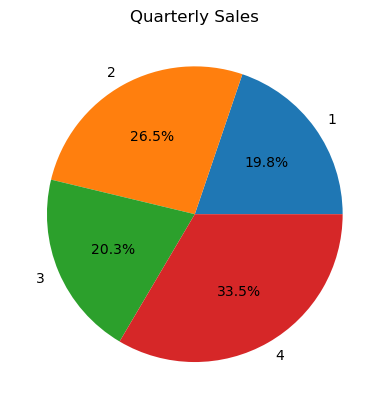

In [24]:
labels = df_quarterly_sales['Quarter']
sales = df_quarterly_sales['Sales']

fig, ax = plt.subplots()
ax.pie(sales, labels=labels, autopct='%1.1f%%')
ax.set_title('Quarterly Sales')

plt.show()

### 3.Monthwise Sales

In [25]:
Monthwise_total_sales=data.groupby(['Month'])['Sales'].sum()
df_Monthwise_total_sales = pd.DataFrame({'Month': Monthwise_total_sales.index, 'Total Sales': Monthwise_total_sales.values})
df_Monthwise_total_sales

,Month,Total Sales
0,01,1812742.87
1,02,2200078.08
2,03,2804973.35
3,04,3389217.98
4,05,3150616.23
5,06,2576280.15
6,07,2646461.32
7,08,2241083.37
8,09,2094465.69
9,10,3734777.86


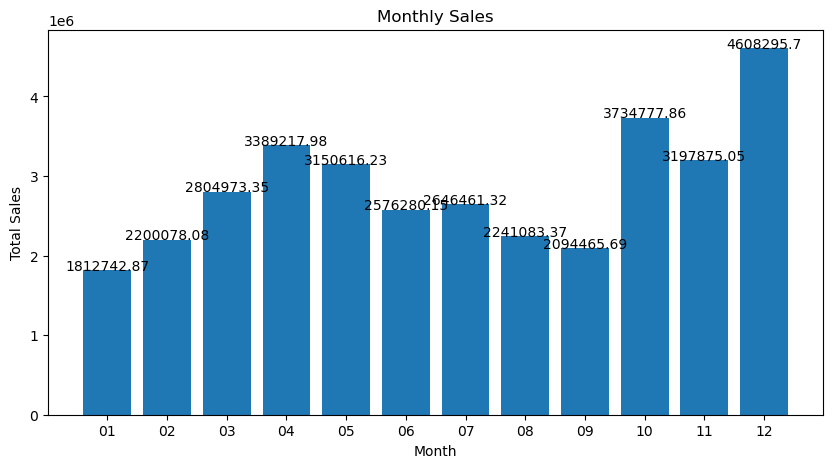

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
labels = df_Monthwise_total_sales['Month']
sales = df_Monthwise_total_sales['Total Sales']
ax.bar(labels, sales)
ax.set_title('Monthly Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')

# Add value labels on top of bars
for i, v in enumerate(sales):
    ax.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.show()


### 4.Weeklywise sales

In [27]:
weekly_sales = data.groupby(['Week'])['Sales'].sum()
df_weekly_sales = pd.DataFrame({'Week': weekly_sales.index, 'Total Sales': weekly_sales.values})
df_weekly_sales.head(3)

,Week,Total Sales
0,1,627975.87
1,2,409389.43
2,3,394921.11


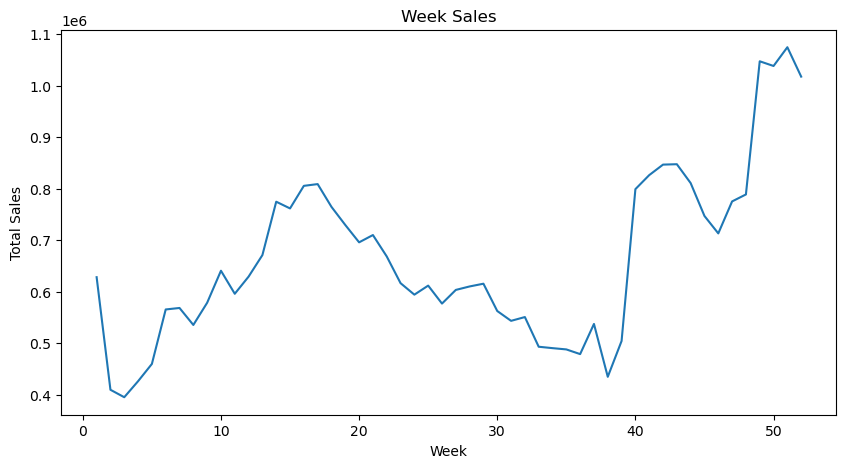

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
labels = df_weekly_sales['Week']
sales = df_weekly_sales['Total Sales']
ax.plot(labels, sales)
ax.set_title('Week Sales')
ax.set_xlabel('Week')
ax.set_ylabel('Total Sales')
plt.show()


### 5.city-wise sales

In [29]:
city_sales = data.groupby(['City'])['Sales'].sum()
city_sales_df = pd.DataFrame({'City': city_sales.index, 'Total Sales': city_sales.values})
city_sales_df.head(3)

,City,Total Sales
0,Atlanta,2794199.07
1,Austin,1817544.35
2,Boston,3657300.76


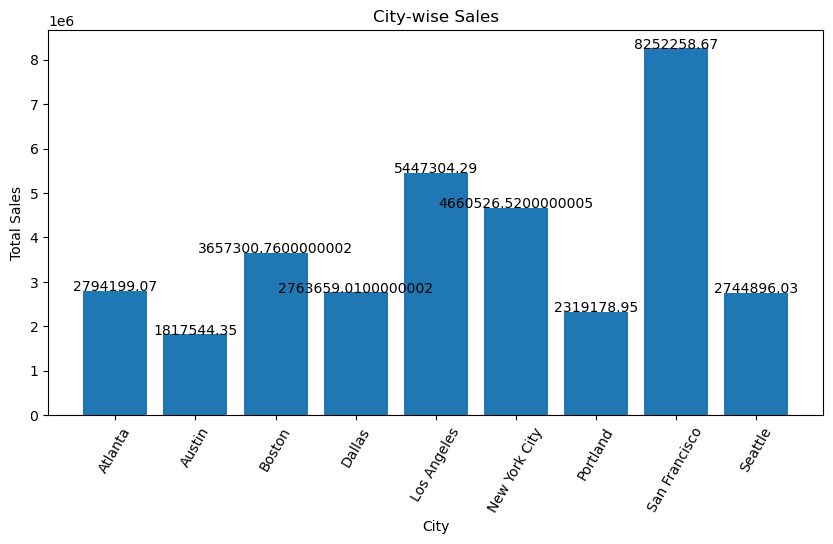

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
labels = city_sales_df['City']
sales = city_sales_df['Total Sales']
ax.bar(labels, sales)
ax.set_title('City-wise Sales')
ax.set_xlabel('City')
ax.set_xticklabels(labels, rotation=60)
ax.set_ylabel('Total Sales')

# Add value labels on top of bars
for i, v in enumerate(sales):
    ax.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.show()

### 6.Product Quantity-wise sales

In [31]:
Product_sales = data.groupby(['Product'])['Sales'].sum()
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)
Product_Quantity = data.groupby(['Product'])['Quantity Ordered'].sum()
Product_sales_df = pd.DataFrame({'Product': Product_sales.index, 'Total Sales': Product_sales.values, 'Quantity Ordered': Product_Quantity.values})
Product_sales_df = Product_sales_df.sort_values(by='Total Sales', ascending=False)
Product_sales_df['Rank'] = Product_sales_df['Total Sales'].rank(ascending=False, method='min')
Product_sales_df.head(3)


,Product,Total Sales,Quantity Ordered,Rank
13,Macbook Pro Laptop,8030800.00,4724,1.0
18,iPhone,4791500.00,6845,2.0
14,ThinkPad Laptop,4125958.74,4126,3.0


#### Percentage of productsales to overall sales

In [32]:
Product_sales_df["percentage_of_sales"]=(Product_sales_df["Total Sales"]/Total_sales)*100
Product_sales_df.sort_values(by='Total Sales', ascending=False)
Product_sales_df["cumulative percentage"]=Product_sales_df["percentage_of_sales"].cumsum()
Product_sales_df.sort_values(by='Total Sales', ascending=False)

,Product,Total Sales,Quantity Ordered,Rank,percentage_of_sales,cumulative percentage
13,Macbook Pro Laptop,8030800.00,4724,1.0,23.306820,23.306820
18,iPhone,4791500.00,6845,2.0,13.905791,37.212611
14,ThinkPad Laptop,4125958.74,4126,3.0,11.974271,49.186882
9,Google Phone,3316800.00,5528,4.0,9.625948,58.812829
1,27in 4K Gaming Monitor,2432757.62,6238,5.0,7.060298,65.873128
3,34in Ultrawide Monitor,2352898.08,6192,6.0,6.828532,72.701659
6,Apple Airpods Headphones,2344950.00,15633,7.0,6.805465,79.507124
8,Flatscreen TV,1443600.00,4812,8.0,4.189586,83.696710
7,Bose SoundSport Headphones,1342565.73,13427,9.0,3.896366,87.593076
2,27in FHD Monitor,1130624.62,7538,10.0,3.281275,90.874351


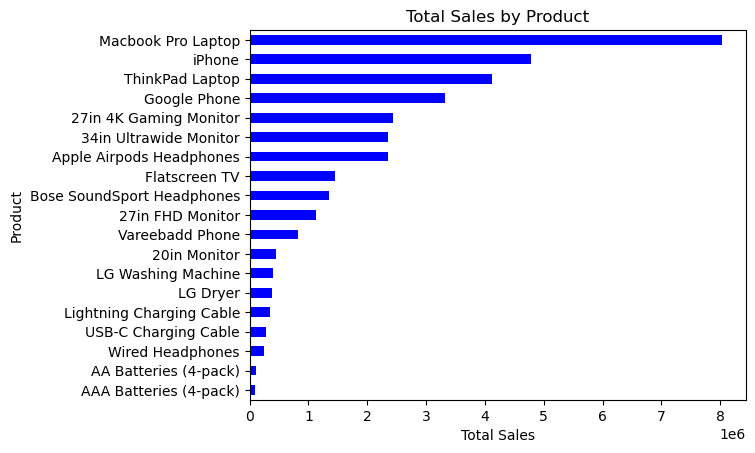

In [33]:
import matplotlib.pyplot as plt

Product_sales_df = Product_sales_df.sort_values(by='Total Sales', ascending=True)
Product_sales_df.plot.barh(x='Product', y='Total Sales', color='blue', legend=False)

plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Total Sales by Product')
plt.show()


In [34]:
Product_Quantity_df = Product_sales_df.sort_values(by='Quantity Ordered', ascending=False)
Product_Quantity_df.head(3)

,Product,Total Sales,Quantity Ordered,Rank,percentage_of_sales,cumulative percentage
5,AAA Batteries (4-pack),92633.19,30981,19.0,0.268838,100.000000
4,AA Batteries (4-pack),106041.60,27615,18.0,0.307752,99.731162
15,USB-C Charging Cable,285927.65,23927,16.0,0.829813,98.709373


#### percentage of product order quantity to overall order

In [35]:
total_order=data["Quantity Ordered"].sum()
Product_Quantity_df["percentage_of_order_quantity"]=(Product_Quantity_df["Quantity Ordered"]/total_order)*100
Product_Quantity_df.sort_values(by='Quantity Ordered', ascending=False)
Product_Quantity_df["cumulative percentage_order"]=Product_Quantity_df["percentage_of_order_quantity"].cumsum()
Product_Quantity_df.sort_values(by='Quantity Ordered', ascending=False)


,Product,Total Sales,Quantity Ordered,Rank,percentage_of_sales,cumulative percentage,percentage_of_order_quantity,cumulative percentage_order
5,AAA Batteries (4-pack),92633.19,30981,19.0,0.268838,100.000000,14.839705,14.839705
4,AA Batteries (4-pack),106041.60,27615,18.0,0.307752,99.731162,13.227412,28.067117
15,USB-C Charging Cable,285927.65,23927,16.0,0.829813,98.709373,11.460883,39.528000
12,Lightning Charging Cable,346286.85,23163,15.0,1.004986,97.879560,11.094932,50.622931
17,Wired Headphones,246034.80,20520,17.0,0.714037,99.423410,9.828951,60.451883
6,Apple Airpods Headphones,2344950.00,15633,7.0,6.805465,79.507124,7.488109,67.939992
7,Bose SoundSport Headphones,1342565.73,13427,9.0,3.896366,87.593076,6.431449,74.371440
2,27in FHD Monitor,1130624.62,7538,10.0,3.281275,90.874351,3.610655,77.982095
18,iPhone,4791500.00,6845,2.0,13.905791,37.212611,3.278712,81.260807
1,27in 4K Gaming Monitor,2432757.62,6238,5.0,7.060298,65.873128,2.987963,84.248770


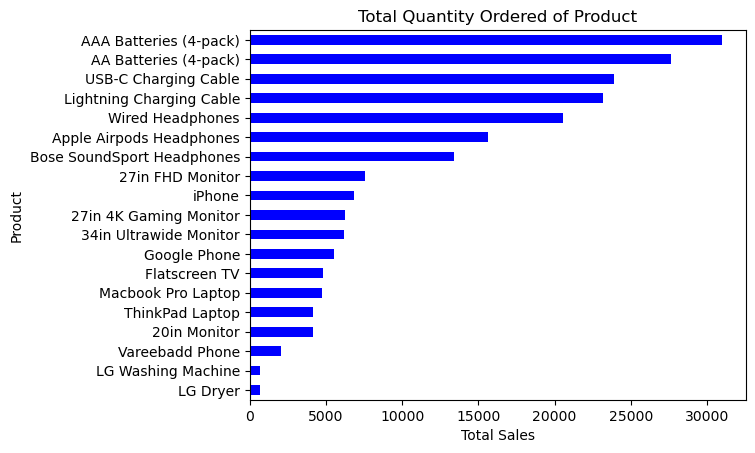

In [36]:
import matplotlib.pyplot as plt

Product_Quantity_df = Product_sales_df.sort_values(by='Quantity Ordered', ascending=True)
Product_Quantity_df.plot.barh(x='Product', y='Quantity Ordered', color='blue', legend=False)

plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Total Quantity Ordered of Product')
plt.show()


In [37]:
wh_data = data[data['Product'] == 'Macbook Pro Laptop']
wh_weekly_sales = wh_data.groupby('Month')['Sales'].sum()
wh_weekly_sales_df = pd.DataFrame({'Month': wh_weekly_sales.index, 'Total Sales of Macbook Pro Laptop': wh_weekly_sales.values})
wh_weekly_sales_df.head(2)



,Month,Total Sales of Macbook Pro Laptop
0,01,397800.0
1,02,469200.0


### product sales weekly

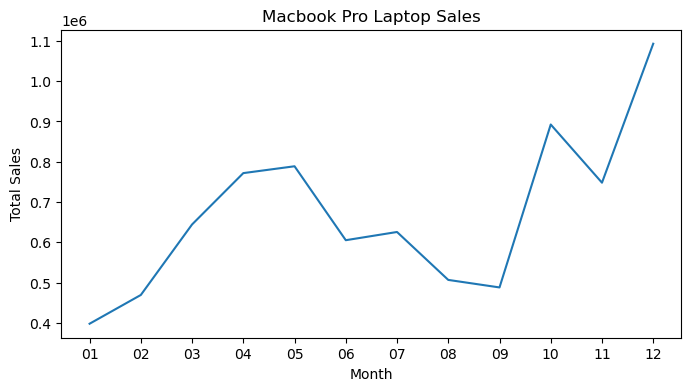

In [38]:
fig, ax = plt.subplots(figsize=(8, 4))
labels = wh_weekly_sales_df['Month']
sales = wh_weekly_sales_df['Total Sales of Macbook Pro Laptop']
ax.plot(labels, sales)
ax.set_title("Macbook Pro Laptop Sales")
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
plt.show()


In [39]:
wh_data_iphone = data[data['Product'] == 'iPhone']
wh_weekly_sales_iphone = wh_data_iphone.groupby('Month')['Sales'].sum()
wh_weekly_sales_df_iphone = pd.DataFrame({'Month': wh_weekly_sales_iphone.index, 'Total Sales of iPhone': wh_weekly_sales_iphone.values})
wh_weekly_sales_df_iphone.head(2)



,Month,Total Sales of iPhone
0,01,265300.0
1,02,306600.0


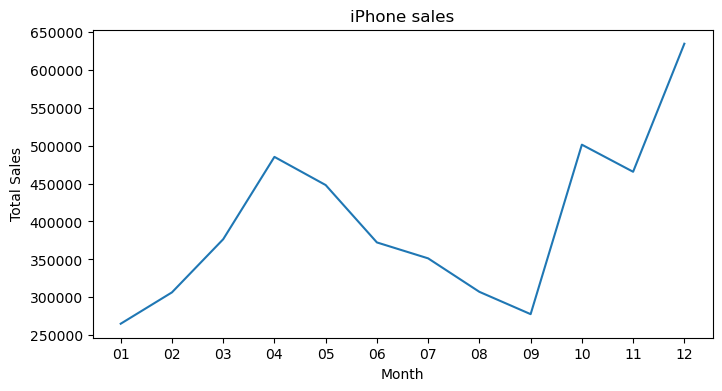

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
labels = wh_weekly_sales_df_iphone['Month']
sales = wh_weekly_sales_df_iphone['Total Sales of iPhone']
ax.plot(labels, sales)
ax.set_title("iPhone sales")
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
plt.show()

In [41]:
wh_data_game = data[data['Product'] == '27in 4K Gaming Monitor']
wh_weekly_sales_game = wh_data_game.groupby('Month')['Sales'].sum()
wh_weekly_sales_df_game = pd.DataFrame({'Month': wh_weekly_sales_game.index, 'Total Sales of game': wh_weekly_sales_game.values})
wh_weekly_sales_df_game.head(2)


,Month,Total Sales of game
0,01,121676.88
1,02,166135.74


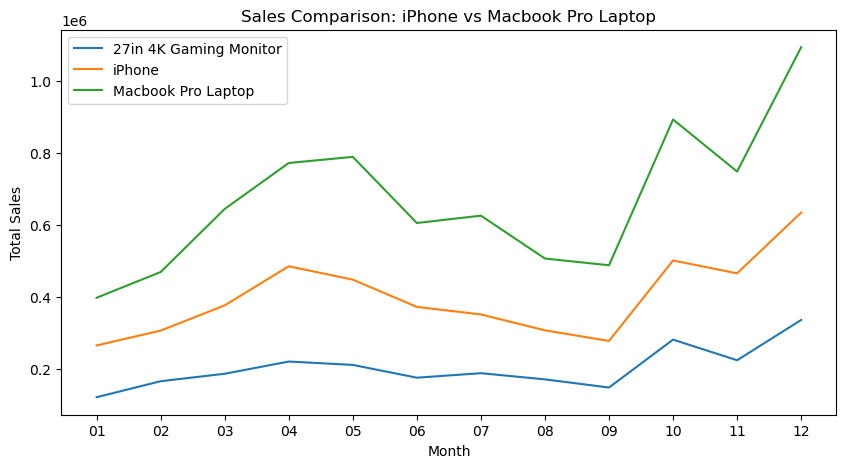

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot for gaming product sales
labels_game = wh_weekly_sales_df_game['Month']
sales_game = wh_weekly_sales_df_game['Total Sales of game']
ax.plot(labels_game, sales_game, label='27in 4K Gaming Monitor')

# Plot for iPhone sales
labels_iphone = wh_weekly_sales_df_iphone['Month']
sales_iphone = wh_weekly_sales_df_iphone['Total Sales of iPhone']
ax.plot(labels_iphone, sales_iphone, label='iPhone')

# Plot for Macbook Pro Laptop sales
labels_laptop = wh_weekly_sales_df['Month']
sales_laptop = wh_weekly_sales_df['Total Sales of Macbook Pro Laptop']
ax.plot(labels_laptop, sales_laptop, label='Macbook Pro Laptop')

# Set common title, x-label, and y-label for both plots
ax.set_title("Sales Comparison: iPhone vs Macbook Pro Laptop")
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')

# Add legend to differentiate between the two plots
ax.legend()

# Display the plot
plt.show()


### ORDER TIMINGS OF THE PRODUCT

In [43]:
Order_timings=data.groupby(['Order_Hour'])['Quantity Ordered'].sum()
Order_time_quantity = pd.DataFrame({'Ordered_Hour': Order_timings.index, 'Total orederd quantity': Order_timings.values})
Order_time_quantity.head(2)

,Ordered_Hour,Total orederd quantity
0,00,4404
1,01,2607


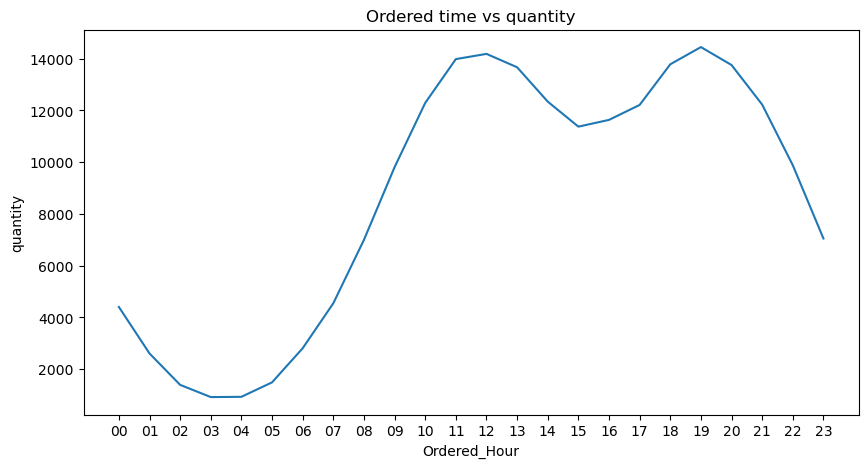

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
labels = Order_time_quantity['Ordered_Hour']
sales = Order_time_quantity['Total orederd quantity']
ax.plot(labels, sales)
ax.set_title('Ordered time vs quantity')
ax.set_xlabel('Ordered_Hour')
ax.set_ylabel('quantity')
plt.show()

In [45]:
cutomer_count_product = data.groupby('Order ID')['Product'].apply(','.join)
cutomer_count_product_df = pd.DataFrame({'Order ID': cutomer_count_product.index, 'Product': cutomer_count_product.values})
cutomer_count_product_df.head(2)


,Order ID,Product
0,141234,iPhone
1,141235,Lightning Charging Cable


### Sales forecasting

In [46]:
grouped_df = data.groupby([ 'Week']).agg({'Quantity Ordered': 'sum', 'Sales': 'sum'}).reset_index()
grouped_df.head(2)

,Week,Quantity Ordered,Sales
0,1,3851,627975.87
1,2,2454,409389.43


### Time-series analysis

In [47]:
# Set the 'Week' column as the index of the DataFrame
grouped_df1 = grouped_df.set_index('Week')

# Calculate the 4-week moving average of sales
grouped_df1['3-Week MA'] = grouped_df['Quantity Ordered'].rolling(window=3).mean()

# Calculate the 8-week moving average of sales
grouped_df1['4-Week MA'] = grouped_df['Quantity Ordered'].rolling(window=4).mean()

# Display the DataFrame
grouped_df1.tail()

,Quantity Ordered,Sales,3-Week MA,4-Week MA
Week,,,,
48,4778,788596.13,5203.666667,5030.50
49,6147,1047118.24,5759.333333,5491.00
50,6353,1038000.94,6307.666667,5925.25
51,6423,1074422.49,6414.333333,6347.50
52,6467,1017333.16,NaN,NaN


### ARIMA Method:

In [48]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with order (1, 1, 1)
model = ARIMA(grouped_df['Quantity Ordered'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the sales for the 53rd week
fcst = model_fit.forecast(steps=1)

print("Forecasted sales for the 53rd week:", fcst)


Forecasted sales for the 53rd week: 52    6446.359456
dtype: float64


In [49]:
grouped_df.head(2)

,Week,Quantity Ordered,Sales
0,1,3851,627975.87
1,2,2454,409389.43


### ExponentialSmoothing

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Set the 'Week' column as the index of the DataFrame
grouped_df = grouped_df.set_index('Week')

# Create an Exponential Smoothing object with the desired parameters
exp_smoothing_model = ExponentialSmoothing(grouped_df['Quantity Ordered'], trend='add', seasonal=None)

# Fit the model to the data
exp_smoothing_fit = exp_smoothing_model.fit()

# Generate forecasted values for the next 4 weeks
forecast_values = exp_smoothing_fit.forecast(steps=4)

# Print the forecasted values
print(forecast_values)


52    6552.627379
53    6635.495333
54    6718.363287
55    6801.231241
dtype: float64


C:\Users\Vaidees\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vaidees\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [51]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Day,Year,Order_Hour,Order_Minutes,City,Week,Quarter
70630,144159,AA Batteries (4-pack),1,3.84,3.84,01,01,19,21,46,Atlanta,1,1
71311,144804,Wired Headphones,1,11.99,11.99,01,01,19,07,29,New York City,1,1
73627,147019,Bose SoundSport Headphones,1,99.99,99.99,01,01,19,22,51,New York City,1,1
68826,142451,AAA Batteries (4-pack),1,2.99,2.99,01,01,19,06,41,Boston,1,1
71806,145270,Google Phone,1,600,600.00,01,01,19,07,33,Dallas,1,1


In [52]:
newdata= data.groupby([ 'Week']).agg({'Quantity Ordered': 'sum', 'Sales': 'sum'}).reset_index()
newdata

,Week,Quantity Ordered,Sales
0,1,3851,627975.87
1,2,2454,409389.43
2,3,2460,394921.11
3,4,2523,426020.17
4,5,2777,459570.62
5,6,3292,565300.05
6,7,3432,568199.28
7,8,3394,535207.51
8,9,3541,578306.44
9,10,3840,640496.38


### Correlation Coefficients Matrix

In [53]:
# Calculate the correlation coefficients between columns
corr_matrix = newdata.corr()

# Display the correlation matrix
print(corr_matrix)

                      Week  Quantity Ordered     Sales
Week              1.000000          0.564389  0.540863
Quantity Ordered  0.564389          1.000000  0.988469
Sales             0.540863          0.988469  1.000000


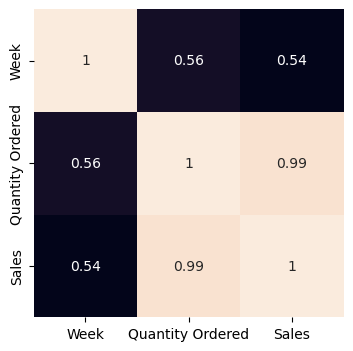

In [54]:
plt.figure(figsize=(4, 4))
sns.heatmap(newdata.corr() ,
           annot=True,
           cbar=False)
plt.show()

## Developing Model:

In [55]:
X = newdata.drop('Sales', axis = 1).values
y = newdata["Sales"].values
y=y.reshape(-1,1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print("shape of  X_train data",X_train.shape)
print("shape of  y_train data",y_train.shape)
print("shape of  X_test  data",X_test.shape)
print("shape of   y_test data",y_test.shape)

shape of  X_train data (41, 2)
shape of  y_train data (41, 1)
shape of  X_test  data (11, 2)
shape of   y_test data (11, 1)


### Regression Nodels:

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


In [59]:
models=[LinearRegression(), Ridge(), Lasso(), ElasticNet(),   SVR(), DecisionTreeRegressor() ,
        RandomForestRegressor(),  GradientBoostingRegressor(), MLPRegressor() ]

In [60]:
result=[]
for i in range(9):
    from sklearn.metrics import r2_score
    from sklearn.metrics import r2_score, mean_squared_error
    from sklearn.model_selection import cross_val_score
    models[i].fit(X_train, y_train)
    cv = cross_val_score(estimator =models[i] , X = X_train, y = y_train, cv = 10)
    y_pred =models[i] .predict(X_train)
    r2_score_train = r2_score(y_train, y_pred)  
    
    y_pred = estimator =models[i].predict(X_test)
    r2_score_test = r2_score(y_test, y_pred)
    
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    print("name of the model :",models[i])
    print("CV: ", cv.mean())
    print('R2_score (train): ', r2_score_train)
    print('R2_score (test): ', r2_score_test)
    print("RMSE: ", rmse,"  \n")
    
    result.append({'Model': str(models[i]), 'CV': cv.mean(),
                         'R2_score (train)': r2_score_train, 'R2_score (test)': r2_score_test,'RMSE': rmse})
    

df_results = pd.DataFrame(result)



name of the model : LinearRegression()
CV:  0.9323515942019082
R2_score (train):  0.9761405514581569
R2_score (test):  0.976200690044762
RMSE:  26492.875756151814   

name of the model : Ridge()
CV:  0.9323539249381421
R2_score (train):  0.9761405514545425
R2_score (test):  0.9762005382044404
RMSE:  26492.960268693645   

name of the model : Lasso()
CV:  0.9323518811301529
R2_score (train):  0.97614055145788
R2_score (test):  0.9762006480771213
RMSE:  26492.89911487528   

name of the model : ElasticNet()
CV:  0.9323947022118991
R2_score (train):  0.976140549927453
R2_score (test):  0.9761975639965262
RMSE:  26494.615623574577   

name of the model : SVR()
CV:  -0.756284925772581
R2_score (train):  -0.051139776773047485
R2_score (test):  -0.3915608477197885
RMSE:  202580.67821648775   

name of the model : DecisionTreeRegressor()
CV:  0.6099976664075827
R2_score (train):  1.0
R2_score (test):  0.9633344563703883
RMSE:  32883.344660114075   

name of the model : RandomForestRegressor()


### Regression results:

In [61]:
df_results.sort_values(by='R2_score (test)', ascending=False)

,Model,CV,R2_score (train),R2_score (test),RMSE
0,LinearRegression(),0.932352,0.976141,0.976201,26492.875756
2,Lasso(),0.932352,0.976141,0.976201,26492.899115
1,Ridge(),0.932354,0.976141,0.976201,26492.960269
3,ElasticNet(),0.932395,0.976141,0.976198,26494.615624
7,GradientBoostingRegressor(),0.700214,0.999570,0.970219,29635.718814
5,DecisionTreeRegressor(),0.609998,1.000000,0.963334,32883.344660
6,RandomForestRegressor(),0.804065,0.993623,0.959474,34571.049267
4,SVR(),-0.756285,-0.051140,-0.391561,202580.678216
8,MLPRegressor(),-51.939864,-15.752920,-16.587276,720188.537804


### Regression model prediction:

In [62]:
# Assuming X_new is your new data to predict and best_model_index is the index of the best-performing model in your models list
X_new = np.array([[54, 6500]])

# Predict using the best model
y_new_pred = models[1].predict(X_new)
y_new_pred1 = models[0].predict(X_new)
# Print the prediction
print('Prediction for new data:', y_new_pred)
print('Prediction for new data:', y_new_pred1)

Prediction for new data: [[1061368.37192644]]
Prediction for new data: [[1061368.19902688]]


### Classification

In [63]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Day,Year,Order_Hour,Order_Minutes,City,Week,Quarter
70630,144159,AA Batteries (4-pack),1,3.84,3.84,01,01,19,21,46,Atlanta,1,1
71311,144804,Wired Headphones,1,11.99,11.99,01,01,19,07,29,New York City,1,1


In [64]:
data["Sales"] = data["Sales"].astype(float)
data["important_sale"] = (data["Sales"] > 499).astype(int)
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Day,Year,Order_Hour,Order_Minutes,City,Week,Quarter,important_sale
70630,144159,AA Batteries (4-pack),1,3.84,3.84,01,01,19,21,46,Atlanta,1,1,0
71311,144804,Wired Headphones,1,11.99,11.99,01,01,19,07,29,New York City,1,1,0


In [65]:
data["important_sale"].value_counts()

0    163083
1     22569
Name: important_sale, dtype: int64

In [66]:
col=["Order ID","Product","City","Year","Order_Minutes"]
data.drop(col,axis=1,inplace=True)

In [67]:
data.head(2)

,Quantity Ordered,Price Each,Sales,Month,Day,Order_Hour,Week,Quarter,important_sale
70630,1,3.84,3.84,01,01,21,1,1,0
71311,1,11.99,11.99,01,01,07,1,1,0


In [68]:
X = data.drop('important_sale', axis = 1).values
y = data["important_sale"].values
y=y.reshape(-1,1)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [70]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (139239, 8)
Shape of X_test:  (46413, 8)
Shape of y_train:  (139239, 1)
Shape of y_test (46413, 1)


In [71]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)


### Classification Models:

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [73]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]


In [74]:
for model in models:
    model.fit(X_train, y_train)
    # Evaluate the model's accuracy on the testing data
    score = model.score(X_test, y_test)
    print(f"{type(model).__name__} accuracy: {score:.3f}")
    
    # Generate predictions on the testing and training sets
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate and print the confusion matrices
    print("Confusion matrix for test set:")
    print(confusion_matrix(y_test, y_pred_test))
    print("Confusion matrix for training set:")
    print(confusion_matrix(y_train, y_pred_train))
    
    # Calculate and print the classification report
    print("Classification report for test set:")
    print(classification_report(y_test, y_pred_test))
    print("Classification report for training set:")
    print(classification_report(y_train, y_pred_train))

DecisionTreeClassifier accuracy: 1.000
Confusion matrix for test set:
[[40798     0]
 [    0  5615]]
Confusion matrix for training set:
[[122285      0]
 [     0  16954]]
Classification report for test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40798
           1       1.00      1.00      1.00      5615

    accuracy                           1.00     46413
   macro avg       1.00      1.00      1.00     46413
weighted avg       1.00      1.00      1.00     46413

Classification report for training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122285
           1       1.00      1.00      1.00     16954

    accuracy                           1.00    139239
   macro avg       1.00      1.00      1.00    139239
weighted avg       1.00      1.00      1.00    139239

RandomForestClassifier accuracy: 1.000
Confusion matrix for test set:
[[40798     0]
 [    0  5615]

### classification prediction:

In [75]:
# Assuming X_new is your new data to predict and best_model_index is the index of the best-performing model in your models list
X_new = np.array([[4, 100,400, 1, 1, 21, 1, 1]])

# Predict using the best model
y_new_pred = models[0].predict(X_new)
y_new_pred1 = models[1].predict(X_new)
# Print the prediction
print('Prediction for new data:', y_new_pred)
print('Prediction for new data:', y_new_pred1)

Prediction for new data: [0]
Prediction for new data: [0]


### Clustering Models

In [76]:
newdata.head()

,Week,Quantity Ordered,Sales
0,1,3851,627975.87
1,2,2454,409389.43
2,3,2460,394921.11
3,4,2523,426020.17
4,5,2777,459570.62


### KMeans Clustering

In [77]:
from sklearn import cluster

from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [78]:
km=KMeans(n_clusters=4)
y_predicted = km.fit_predict(newdata[['Week','Sales']])
y_predicted

array([0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3])

In [79]:
km.cluster_centers_

array([[1.95714286e+01, 5.95234660e+05],
       [3.15294118e+01, 7.76588838e+05],
       [2.29000000e+01, 4.57805471e+05],
       [5.05000000e+01, 1.04421871e+06]])

<AxesSubplot:xlabel='Week', ylabel='Sales'>

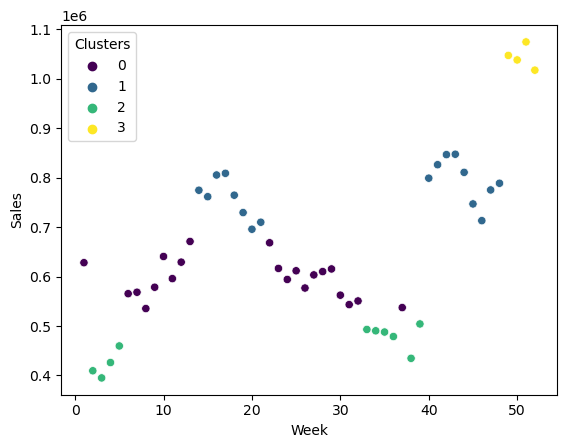

In [80]:
newdata['Clusters'] = km.labels_
sns.scatterplot(x="Week", y="Sales",hue = 'Clusters',  data=newdata,palette='viridis')

In [81]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(newdata)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

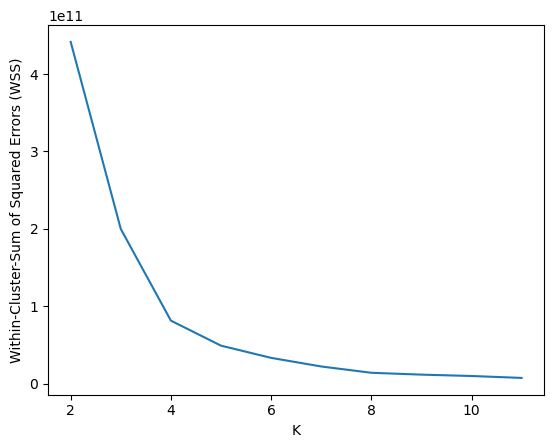

In [82]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [83]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(newdata).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
+str(metrics.silhouette_score(newdata,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6125828185573877
Silhouette score for k(clusters) = 3 is 0.644991838660489
Silhouette score for k(clusters) = 4 is 0.6441882562723864
Silhouette score for k(clusters) = 5 is 0.6064219803813355
Silhouette score for k(clusters) = 6 is 0.5975113188629776
Silhouette score for k(clusters) = 7 is 0.6242754130007986
Silhouette score for k(clusters) = 8 is 0.6112890457481283
Silhouette score for k(clusters) = 9 is 0.6126135663093577
Silhouette score for k(clusters) = 10 is 0.6153726438236429
Silhouette score for k(clusters) = 11 is 0.6102442696082769
Silhouette score for k(clusters) = 12 is 0.6263280591124587


### PCA

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(newdata)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,-34656.561667,42.752518
1,-253247.446513,-48.002106
2,-267715.472367,44.455901
3,-236616.591014,-78.336049
4,-203065.222269,-24.814568


In [85]:
K=range(2,12)
ws = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    ws.append(wss_iter)

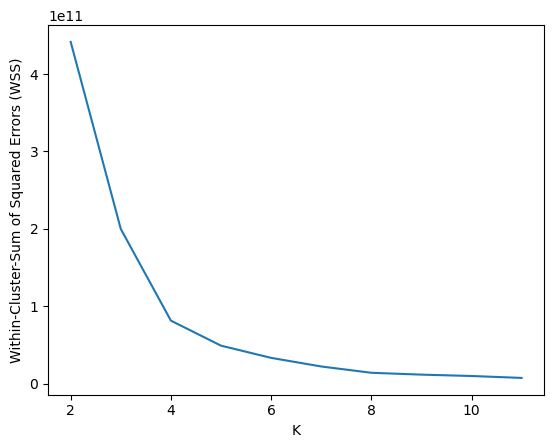

In [86]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [87]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6125828454424374
Silhouette score for k(clusters) = 3 is 0.6449918713804583
Silhouette score for k(clusters) = 4 is 0.6441883130127173
Silhouette score for k(clusters) = 5 is 0.6064221018642273
Silhouette score for k(clusters) = 6 is 0.5975115050656433
Silhouette score for k(clusters) = 7 is 0.6242756244775104
Silhouette score for k(clusters) = 8 is 0.6112894383026568
Silhouette score for k(clusters) = 9 is 0.6126139896367169
Silhouette score for k(clusters) = 10 is 0.6153733057056574
Silhouette score for k(clusters) = 11 is 0.6102450618563233


### Market Basket Analysis

### Apriori Model

In [88]:
cutomer_count_product_df.tail()

,Order ID,Product
178401,319666,Lightning Charging Cable
178402,319667,AA Batteries (4-pack)
178403,319668,Vareebadd Phone
178404,319669,Wired Headphones
178405,319670,Bose SoundSport Headphones


In [104]:
produ_dat=pd.DataFrame(cutomer_count_product_df["Product"].value_counts().index)
produ_dat

,0
0,Lightning Charging Cable
1,AAA Batteries (4-pack)
2,USB-C Charging Cable
3,AA Batteries (4-pack)
4,Wired Headphones
...,...
411,"iPhone,Lightning Charging Cable,34in Ultrawide..."
412,"Wired Headphones,LG Dryer"
413,"iPhone,Vareebadd Phone"
414,"Apple Airpods Headphones,LG Washing Machine"


In [107]:
split_data = [row.split(",") for row in produ_dat[0]]

# Create the new data frame
df2 = pd.DataFrame(split_data)

# Rename the columns to "col0", "col1", "col2", ...
df2.columns = ["product" + str(i) for i in range(df2.shape[1])]

In [110]:
df2

,product0,product1,product2,product3,product4
0,Lightning Charging Cable,None,None,None,None
1,AAA Batteries (4-pack),None,None,None,None
2,USB-C Charging Cable,None,None,None,None
3,AA Batteries (4-pack),None,None,None,None
4,Wired Headphones,None,None,None,None
...,...,...,...,...,...
411,iPhone,Lightning Charging Cable,34in Ultrawide Monitor,None,None
412,Wired Headphones,LG Dryer,None,None,None
413,iPhone,Vareebadd Phone,None,None,None
414,Apple Airpods Headphones,LG Washing Machine,None,None,None


In [112]:
non_na_entries = []
for entry in df2.values:
   non_na_entry = []
   for item in entry:
       if type(item) == str:
           non_na_entry.append(item)
   non_na_entries.append(non_na_entry)


In [133]:
from apyori import apriori
association_rules=apriori(non_na_entries,min_support=0.003,min_confidence=0.5,min_length=2,min_lift=2)
print(list(association_rules))
assoc=pd.DataFrame(association_rules)

[RelationRecord(items=frozenset({'Google Phone', '27in FHD Monitor', 'USB-C Charging Cable'}), support=0.004807692307692308, ordered_statistics=[OrderedStatistic(items_base=frozenset({'27in FHD Monitor', 'USB-C Charging Cable'}), items_add=frozenset({'Google Phone'}), confidence=0.5, lift=2.8108108108108105)]), RelationRecord(items=frozenset({'AA Batteries (4-pack)', 'Google Phone', 'USB-C Charging Cable'}), support=0.007211538461538462, ordered_statistics=[OrderedStatistic(items_base=frozenset({'AA Batteries (4-pack)', 'Google Phone'}), items_add=frozenset({'USB-C Charging Cable'}), confidence=0.5, lift=2.5999999999999996), OrderedStatistic(items_base=frozenset({'AA Batteries (4-pack)', 'USB-C Charging Cable'}), items_add=frozenset({'Google Phone'}), confidence=0.6, lift=3.3729729729729727)]), RelationRecord(items=frozenset({'AA Batteries (4-pack)', 'Lightning Charging Cable', 'iPhone'}), support=0.007211538461538462, ordered_statistics=[OrderedStatistic(items_base=frozenset({'AA Batt

In [134]:
from apyori import apriori
import pandas as pd

# Apply Apriori algorithm to get association rules
association_rules = apriori(non_na_entries, min_support=0.003, min_confidence=0.5, min_length=2, min_lift=2)

# Convert the association rules to a list of dictionaries
rules_list = []
for rule in association_rules:
    rules_list.append({'Items': ', '.join(rule.items), 'Support': rule.support, 
                       'Confidence': rule.ordered_statistics[0].confidence, 'Lift': rule.ordered_statistics[0].lift})

# Create a data frame from the list of dictionaries
assoc = pd.DataFrame(rules_list, columns=['Items', 'Support', 'Confidence', 'Lift'])

# Print the association rules data frame
assoc 


,Items,Support,Confidence,Lift
0,"Google Phone, 27in FHD Monitor, USB-C Charging...",0.004808,0.500000,2.810811
1,"AA Batteries (4-pack), Google Phone, USB-C Cha...",0.007212,0.500000,2.600000
2,"AA Batteries (4-pack), Lightning Charging Cabl...",0.007212,0.600000,3.466667
3,"Apple Airpods Headphones, Lightning Charging C...",0.024038,0.833333,4.814815
4,"Apple Airpods Headphones, Wired Headphones, iP...",0.024038,0.714286,4.126984
5,"Google Phone, Bose SoundSport Headphones, Wire...",0.021635,0.562500,3.162162
6,"Vareebadd Phone, Bose SoundSport Headphones, U...",0.019231,0.571429,2.971429
7,"Google Phone, Wired Headphones, USB-C Charging...",0.031250,0.541667,2.816667
8,"Lightning Charging Cable, iPhone, USB-C Chargi...",0.007212,0.500000,2.888889
9,"Lightning Charging Cable, iPhone, Wired Headph...",0.028846,0.857143,4.952381
